In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data.csv', encoding='cp1252')
print(data)


       stn_code       sampling_date                        state   location  \
0         150.0  February - M021990               Andhra Pradesh  Hyderabad   
1         151.0  February - M021990               Andhra Pradesh  Hyderabad   
2         152.0  February - M021990               Andhra Pradesh  Hyderabad   
3         150.0     March - M031990               Andhra Pradesh  Hyderabad   
4         151.0     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                                           agency  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(data.shape)
print(data.columns)

(435742, 13)
Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
data.count()   #It results in a number of non null values in each column.

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [ ]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


Visualiazation

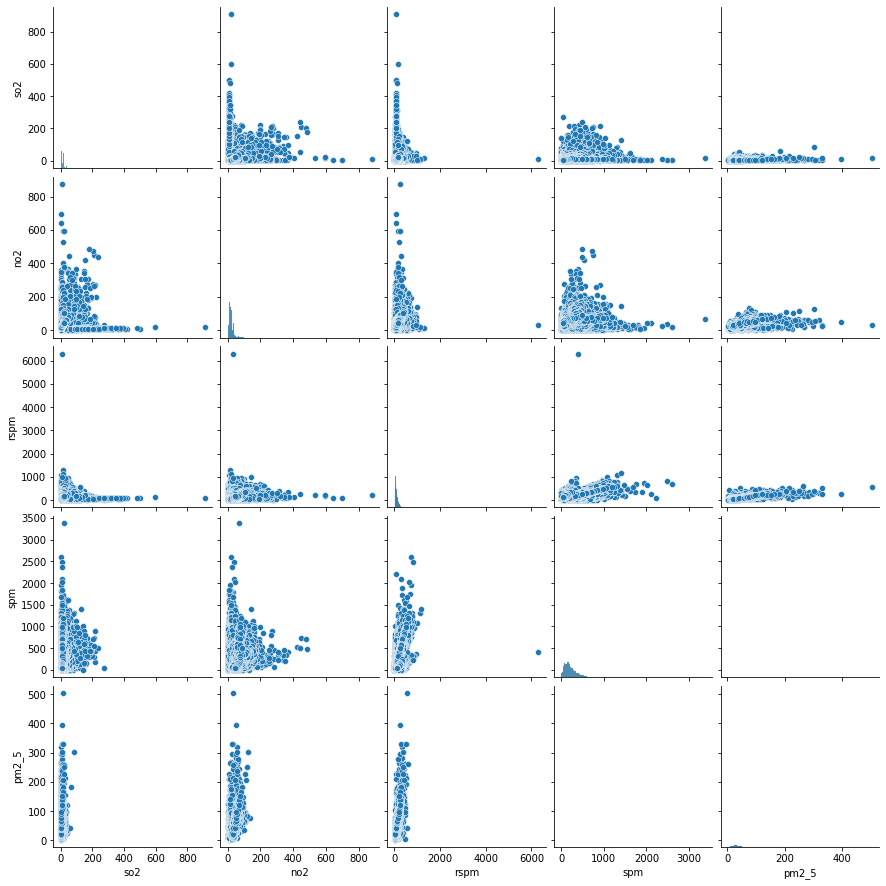

In [ ]:
sns.pairplot(data=data)

[]

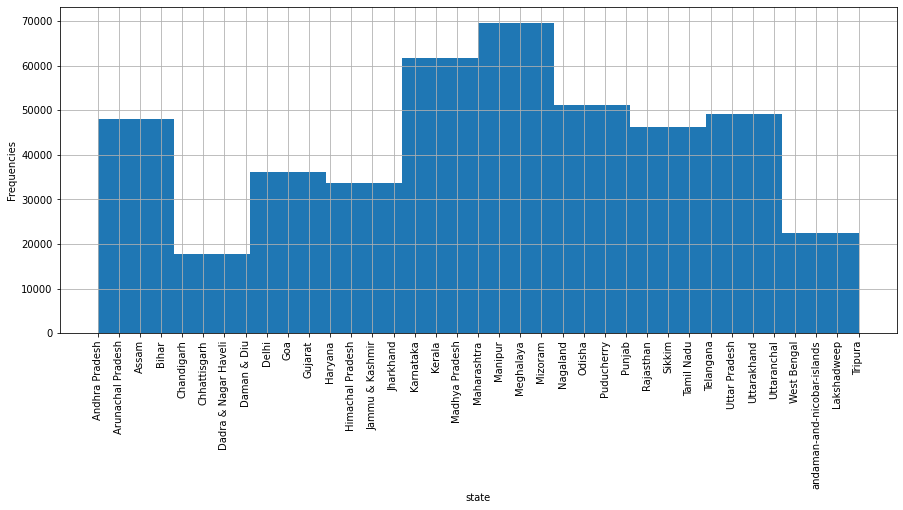

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
data.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

[]

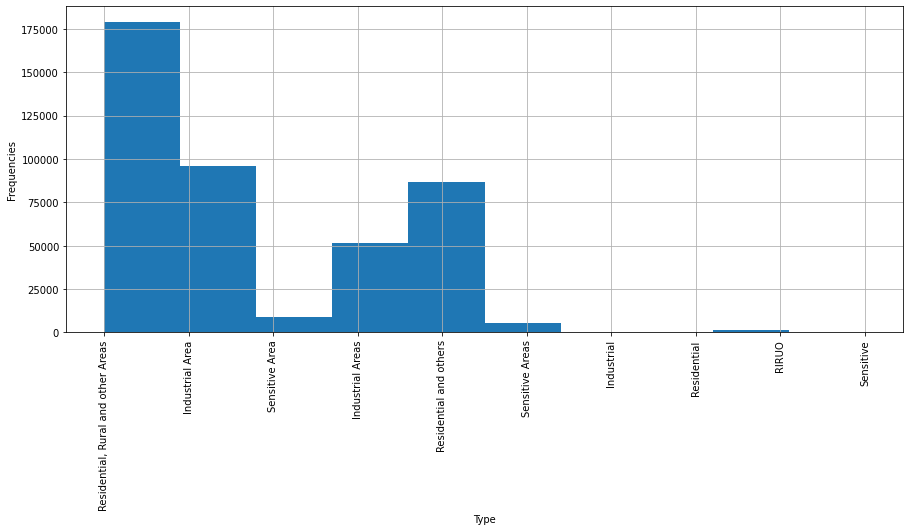

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
data.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

[]

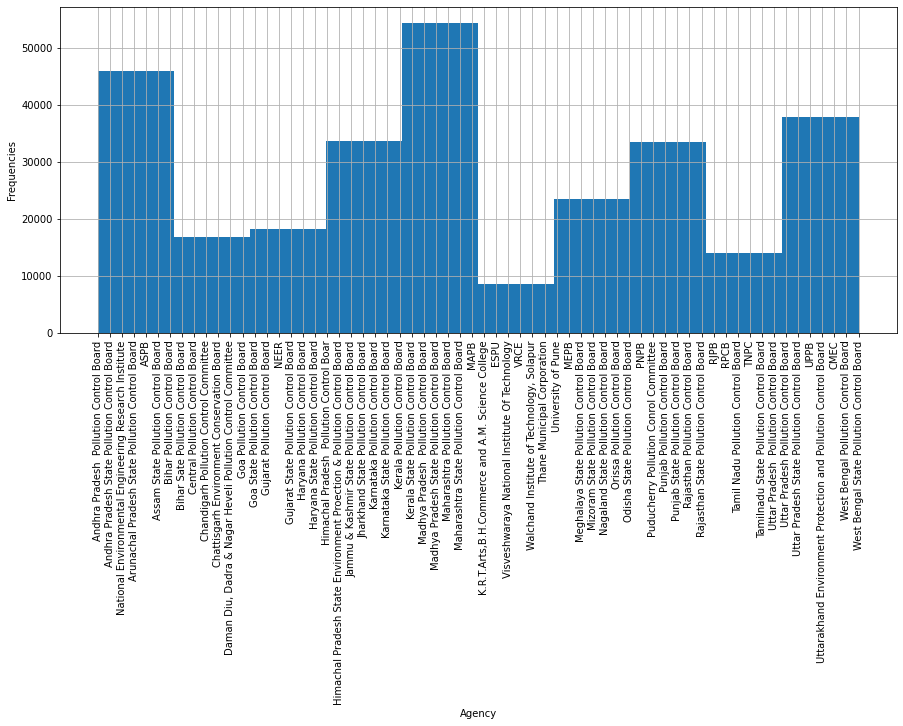

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
data.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

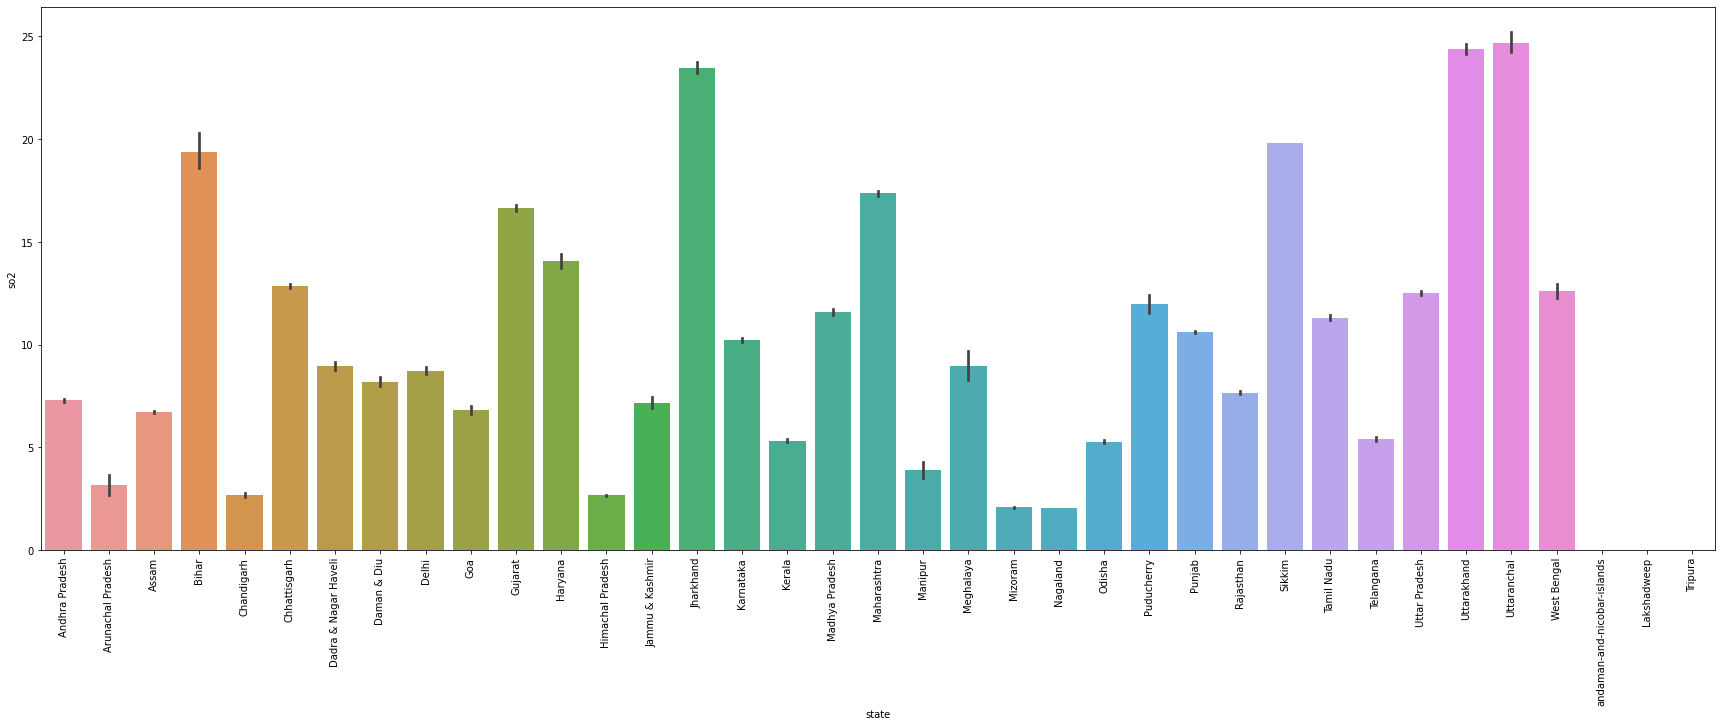

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=data);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

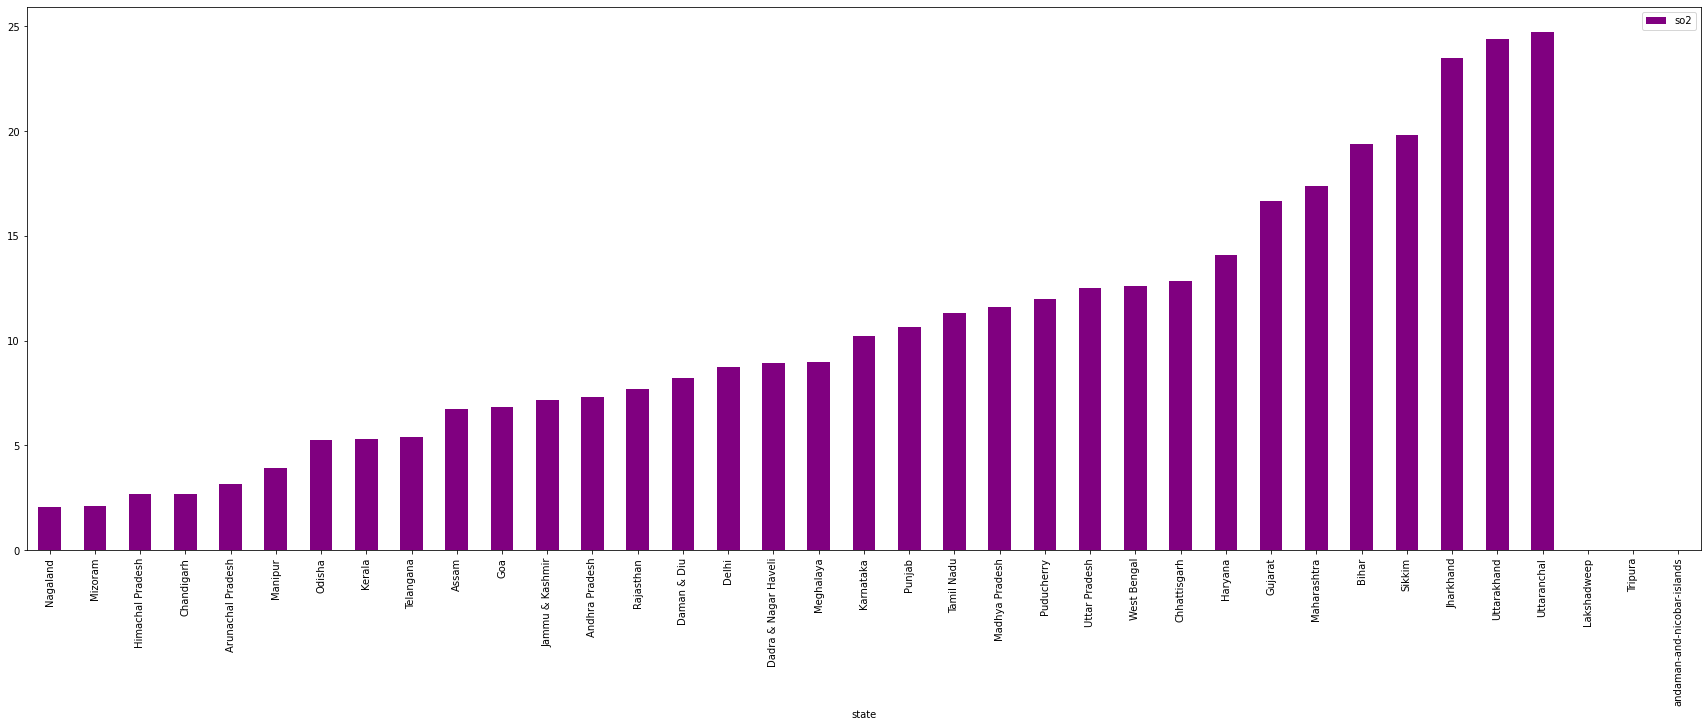

In [ ]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

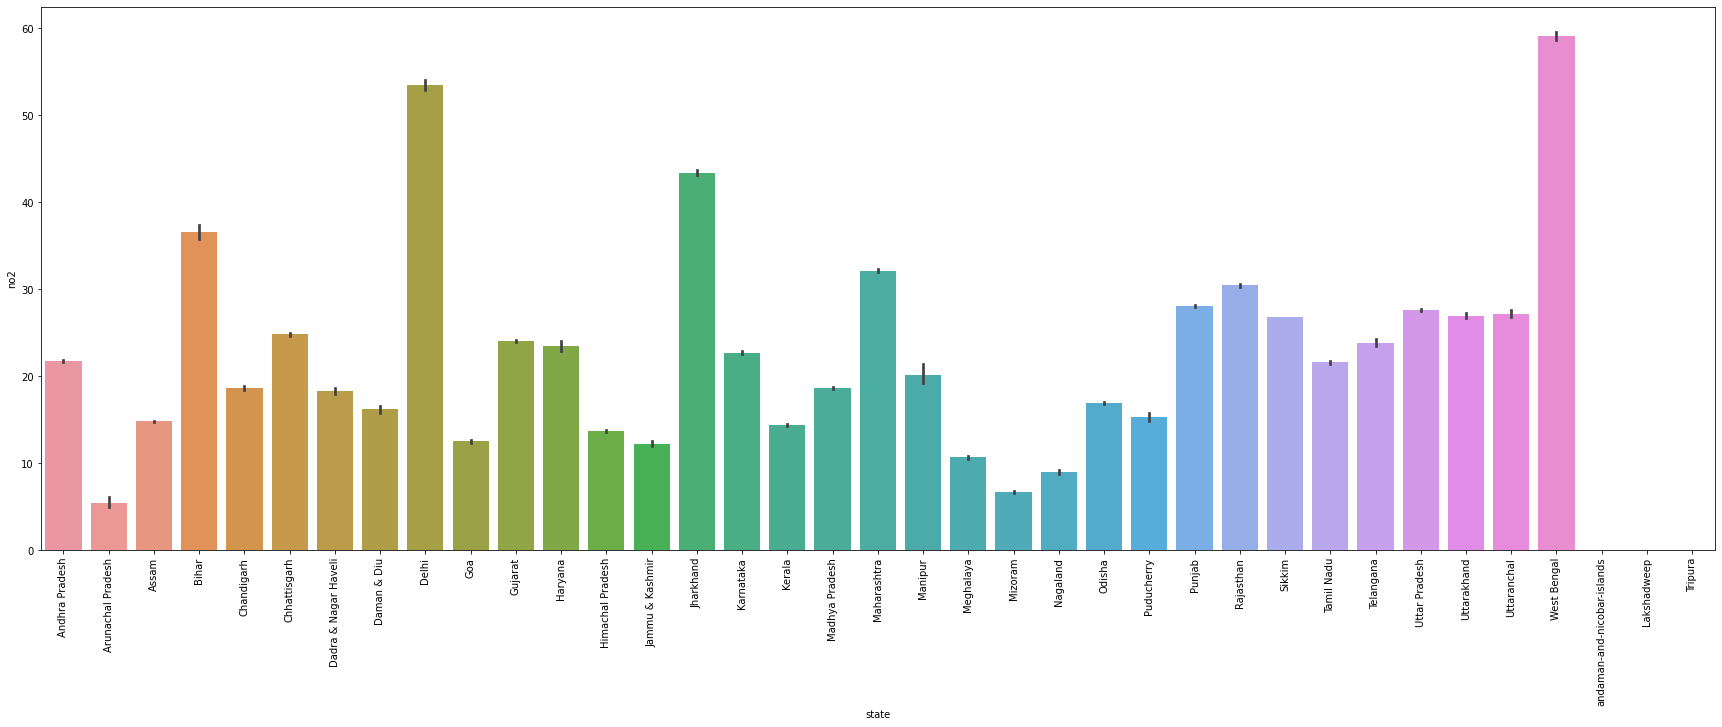

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=data);
# West bengal has a higher no2 level compared to other states 

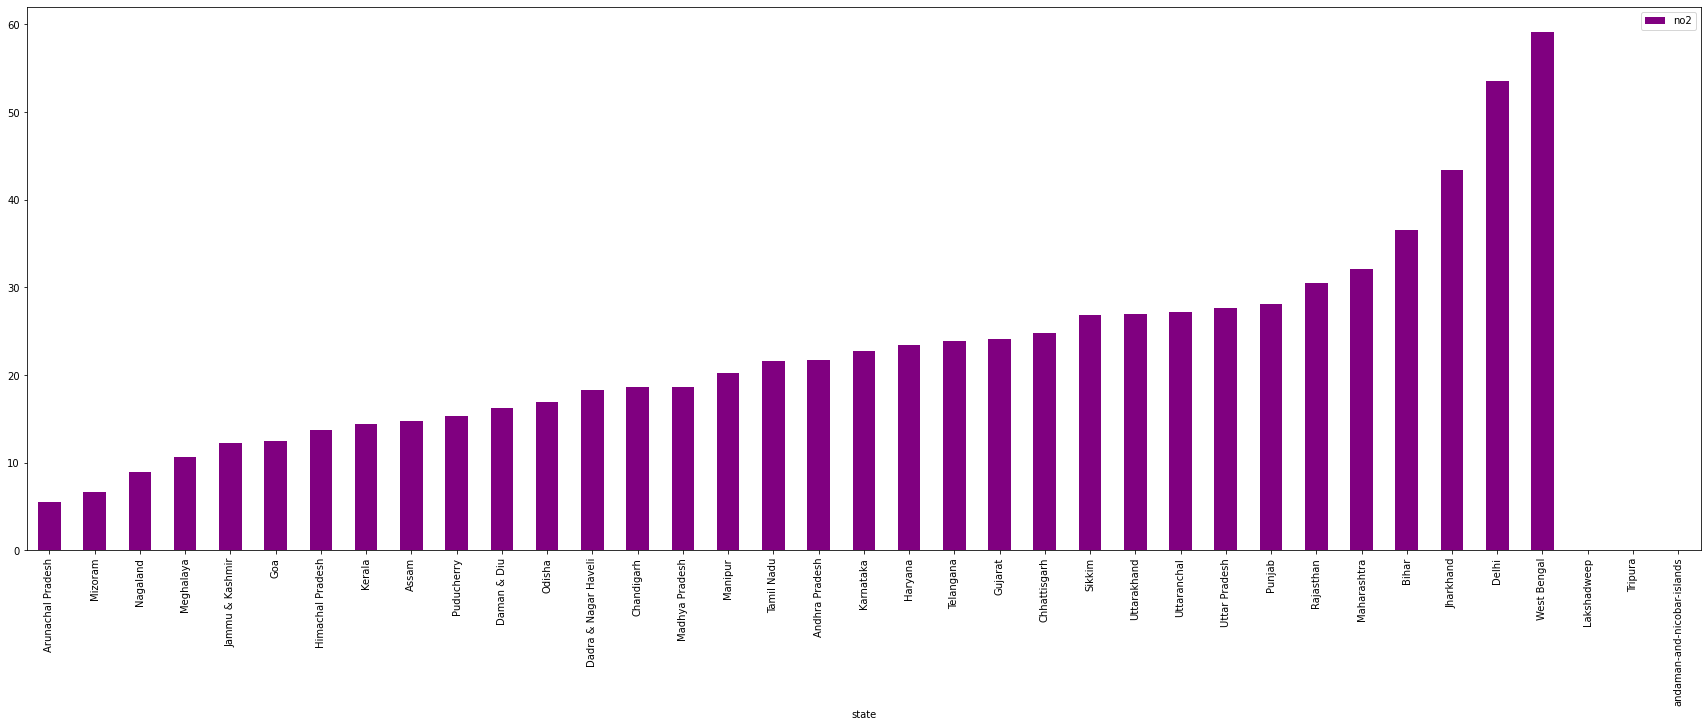

In [ ]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

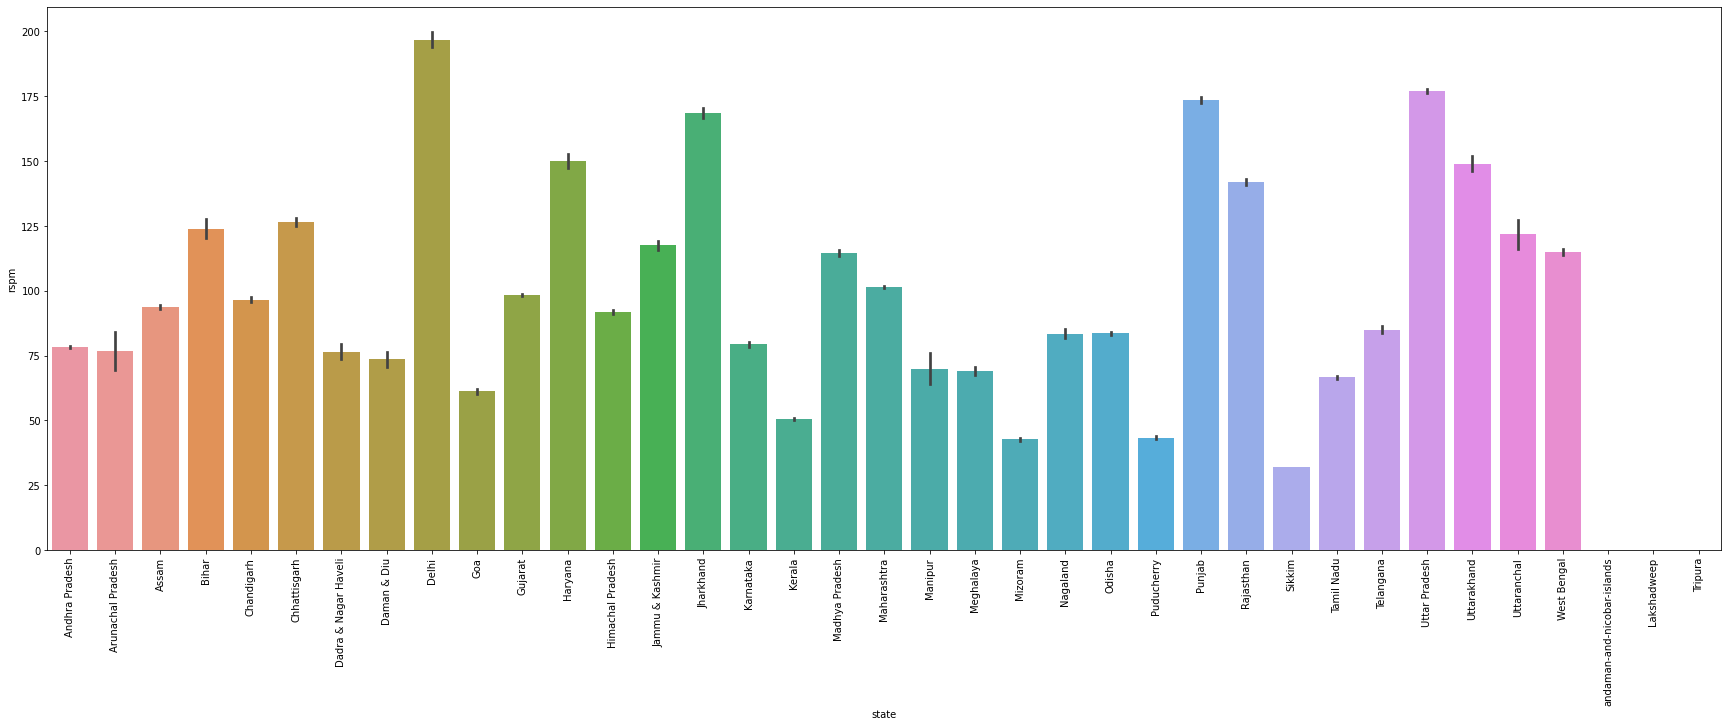

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=data);
# Delhi has higher rspm level compared to other states 

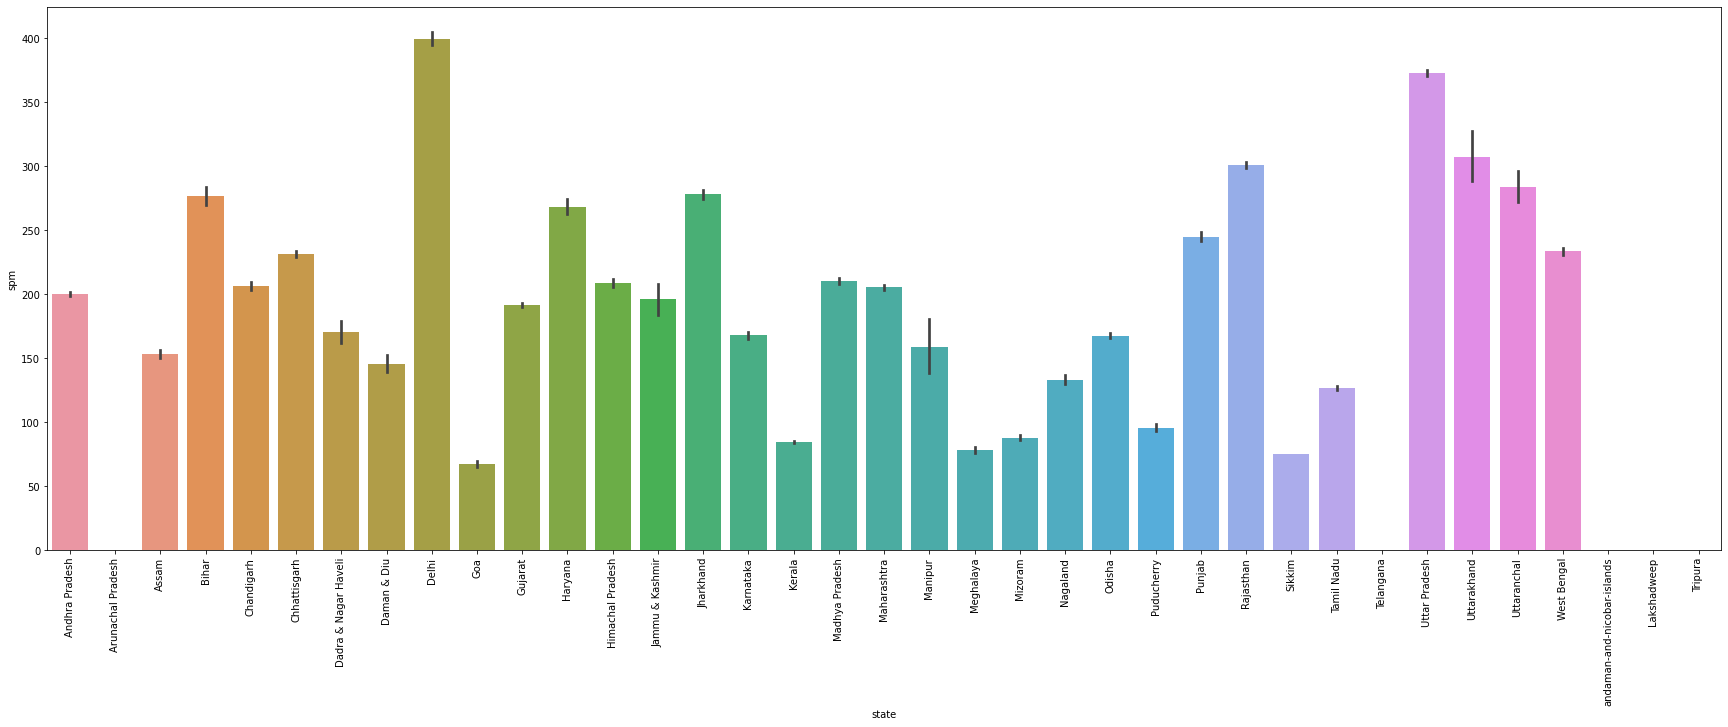

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=data);
# Delhi has higher spm level compared to other states 

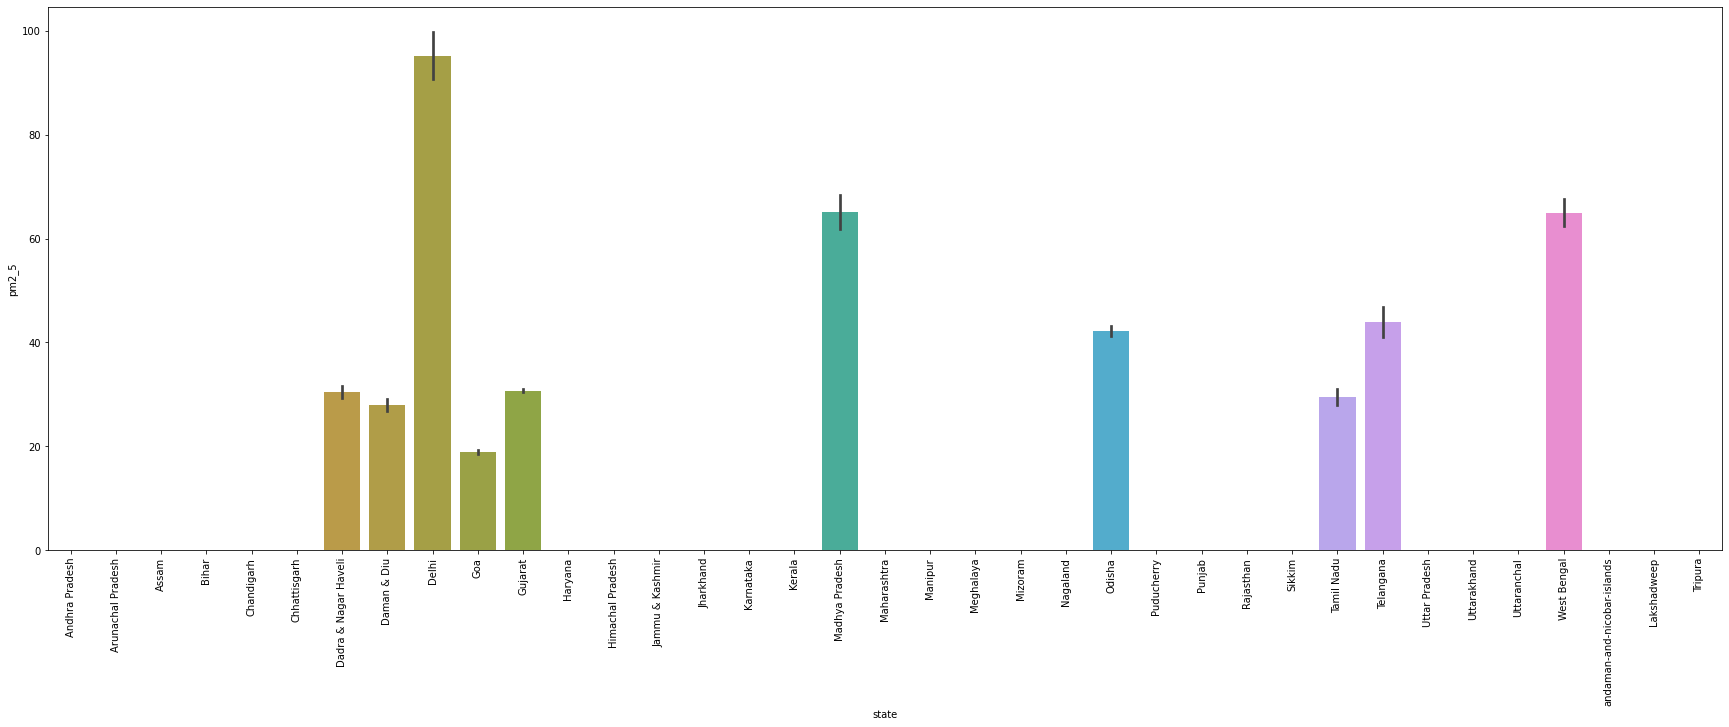

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=data);
# Delhi has higher pm2_5 level compared to other states 

**Cleansing the dataset**


1.stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2.Dropping rows where no date is available.

In [ ]:
data=data.drop(['stn_code', 'agency','sampling_date','location_monitoring_station'], axis = 1)

In [ ]:
data=data.dropna(subset=['date']) # dropping rows where no date is available

In [ ]:
data.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

**Changing the types to uniform format:**


In [ ]:
data["type"].unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [ ]:
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    "NaN": "RRO"
}
data.type = data.type.replace(types)

In [ ]:
data.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


**Creating a year column**


In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [ ]:
data['year'] = data.date.dt.year
data.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


**Handling Missing Values of imp colums**


In [ ]:
# defining columns of importance, which shall be used reguarly
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[COLS] = imputer.fit_transform(data[COLS])

In [ ]:
print(data.head(5))
print(data.info())

            state   location type  so2   no2        rspm        spm  \
0  Andhra Pradesh  Hyderabad  RRO  4.8  17.4  108.833091  220.78348   
1  Andhra Pradesh  Hyderabad    I  3.1   7.0  108.833091  220.78348   
2  Andhra Pradesh  Hyderabad  RRO  6.2  28.5  108.833091  220.78348   
3  Andhra Pradesh  Hyderabad  RRO  6.3  14.7  108.833091  220.78348   
4  Andhra Pradesh  Hyderabad    I  4.7   7.5  108.833091  220.78348   

       pm2_5       date  year  
0  40.791467 1990-02-01  1990  
1  40.791467 1990-02-01  1990  
2  40.791467 1990-02-01  1990  
3  40.791467 1990-03-01  1990  
4  40.791467 1990-03-01  1990  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      430345 non-null  object        
 3   so2       435735 non-null  flo

**Data Transformation**


**Simple Replacement of Categorical Data with a Number**

In [ ]:
print(data.head(5))
data['type'].value_counts()

            state   location type  so2   no2        rspm        spm  \
0  Andhra Pradesh  Hyderabad  RRO  4.8  17.4  108.833091  220.78348   
1  Andhra Pradesh  Hyderabad    I  3.1   7.0  108.833091  220.78348   
2  Andhra Pradesh  Hyderabad  RRO  6.2  28.5  108.833091  220.78348   
3  Andhra Pradesh  Hyderabad  RRO  6.3  14.7  108.833091  220.78348   
4  Andhra Pradesh  Hyderabad    I  4.7   7.5  108.833091  220.78348   

       pm2_5       date  year  
0  40.791467 1990-02-01  1990  
1  40.791467 1990-02-01  1990  
2  40.791467 1990-02-01  1990  
3  40.791467 1990-03-01  1990  
4  40.791467 1990-03-01  1990  


RRO      179013
I        148069
RO        86791
S         15010
RIRUO      1304
R           158
Name: type, dtype: int64

In [ ]:
data['type'].replace({"RRO":1, "I":2, "RO":3,"S":4,"RIRUO":5,"R":6}, inplace= True)
data['type']

0         1.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
435734    5.0
435735    5.0
435736    5.0
435737    5.0
435738    5.0
Name: type, Length: 435735, dtype: float64

In [ ]:
#Converting Categorical Data to Numerical Data Using Label Encoding
#print(data['state'].value_counts())
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data["state"]=labelencoder.fit_transform(data["state"])
print(data)

        state   location  type   so2   no2        rspm        spm      pm2_5  \
0           0  Hyderabad   1.0   4.8  17.4  108.833091  220.78348  40.791467   
1           0  Hyderabad   2.0   3.1   7.0  108.833091  220.78348  40.791467   
2           0  Hyderabad   1.0   6.2  28.5  108.833091  220.78348  40.791467   
3           0  Hyderabad   1.0   6.3  14.7  108.833091  220.78348  40.791467   
4           0  Hyderabad   2.0   4.7   7.5  108.833091  220.78348  40.791467   
...       ...        ...   ...   ...   ...         ...        ...        ...   
435734     33   ULUBERIA   5.0  20.0  44.0  148.000000  220.78348  40.791467   
435735     33   ULUBERIA   5.0  17.0  44.0  131.000000  220.78348  40.791467   
435736     33   ULUBERIA   5.0  18.0  45.0  140.000000  220.78348  40.791467   
435737     33   ULUBERIA   5.0  22.0  50.0  143.000000  220.78348  40.791467   
435738     33   ULUBERIA   5.0  20.0  46.0  171.000000  220.78348  40.791467   

             date  year  
0      1990-0

In [ ]:
#One Hot Encoding
dfAndhra=data[(data['state']==0)]
print(dfAndhra)

       state     location  type  so2   no2        rspm        spm      pm2_5  \
0          0    Hyderabad   1.0  4.8  17.4  108.833091  220.78348  40.791467   
1          0    Hyderabad   2.0  3.1   7.0  108.833091  220.78348  40.791467   
2          0    Hyderabad   1.0  6.2  28.5  108.833091  220.78348  40.791467   
3          0    Hyderabad   1.0  6.3  14.7  108.833091  220.78348  40.791467   
4          0    Hyderabad   2.0  4.7   7.5  108.833091  220.78348  40.791467   
...      ...          ...   ...  ...   ...         ...        ...        ...   
26363      0  Rajahmundry   2.0  7.0  13.0   71.000000  220.78348  40.791467   
26364      0  Rajahmundry   2.0  7.0  18.0   77.000000  220.78348  40.791467   
26365      0  Rajahmundry   2.0  8.0  23.0   64.000000  220.78348  40.791467   
26366      0  Rajahmundry   2.0  7.0  19.0   61.000000  220.78348  40.791467   
26367      0  Rajahmundry   2.0  6.0  17.0   71.000000  220.78348  40.791467   

            date  year  
0     1990-02-

In [ ]:
dfAndhra['location'].value_counts()

Hyderabad         7764
Visakhapatnam     7108
Vijayawada        2093
Chittoor          1003
Tirupati           986
Kurnool            857
Patancheru         698
Guntur             629
Nalgonda           618
Ramagundam         554
Nellore            408
Khammam            385
Warangal           336
Ananthapur         324
Ongole             317
Kadapa             316
Srikakulam         315
Rajahmundry        311
Eluru              300
Vishakhapatnam     297
Kakinada           288
Vizianagaram       282
Sangareddy          85
Karimnagar          67
Nizamabad           27
Name: location, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False,handle_unknown='error',drop='first')
pd.DataFrame(onehotencoder.fit_transform(dfAndhra[["location"]]))


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
datax= data[['so2','SOi']]
datax.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
datay= data[['no2','Noi']]
datay.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [ ]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['Rpi']=data['rspm'].apply(cal_RSPMI)
dataz= data[['rspm','Rpi']]
dataz.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,108.833091,0.0
1,108.833091,0.0
2,108.833091,0.0
3,108.833091,0.0
4,108.833091,0.0


In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
datasp= data[['spm','SPMi']]
datasp.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,220.78348,180.52232
1,220.78348,180.52232
2,220.78348,180.52232
3,220.78348,180.52232
4,220.78348,180.52232


In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data_all= data[['state','SOi','Noi','Rpi','SPMi','AQI']]
data_all.head()
data_all.head(50)
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,0,6.000,21.750,0.0,180.522320,180.522320
1,0,3.875,8.750,0.0,180.522320,180.522320
2,0,7.750,35.625,0.0,180.522320,180.522320
3,0,7.875,18.375,0.0,180.522320,180.522320
4,0,5.875,9.375,0.0,180.522320,180.522320
5,0,8.000,32.125,0.0,180.522320,180.522320
6,0,6.750,21.375,0.0,180.522320,180.522320
7,0,5.875,10.875,0.0,180.522320,180.522320
8,0,5.250,28.750,0.0,180.522320,180.522320
9,0,5.000,11.125,0.0,180.522320,180.522320


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,0,Hyderabad,1.0,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990,6.000,21.750,0.0,180.52232,180.52232,Poor
1,0,Hyderabad,2.0,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990,3.875,8.750,0.0,180.52232,180.52232,Poor
2,0,Hyderabad,1.0,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990,7.750,35.625,0.0,180.52232,180.52232,Poor
3,0,Hyderabad,1.0,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990,7.875,18.375,0.0,180.52232,180.52232,Poor
4,0,Hyderabad,2.0,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990,5.875,9.375,0.0,180.52232,180.52232,Poor


In [ ]:
data['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Poor              327018
Unhealthy          31733
Moderate           30473
Hazardous          18700
Very unhealthy     15823
Good               11988
Name: AQI_Range, dtype: int64

In [ ]:
X=data[['SOi','Noi','Rpi','SPMi']]
Y=data['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,180.52232
1,3.875,8.750,0.0,180.52232
2,7.750,35.625,0.0,180.52232
3,7.875,18.375,0.0,180.52232
4,5.875,9.375,0.0,180.52232


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(348588, 4) (87147, 4) (348588,) (87147,)


In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  3.415682553672005
RMSE TestData =  3.172831496434856
--------------------------------------------------
RSquared value on train: 0.9980081130585218
RSquared value on test: 0.9982801762583589


In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  6.337142233679499e-10
RMSE TestData =  0.8162950226006082
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998861627959473


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.3524801744303241
RMSE TestData =  0.5805349712531418
--------------------------------------------------
RSquared value on train: 0.9999787881244263
RSquared value on test: 0.9999424233096363


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X2 = data[['SOi','Noi','Rpi','SPMi']]
Y2 = data['AQI_Range']
# Splitting the data into independent and dependent columns for classification 

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data 

In [ ]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model accuracy on train is:  0.7767844297839982
Model accuracy on test is:  0.7781046365261174
--------------------------------------------------
KappaScore is:  0.25137718936121667


In [ ]:
log_reg.predict([[727,327.55,78.2,100]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict([[10,2.8,82,20]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['Poor'], dtype=object)

In [ ]:
#fit the model on train data 
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998956833781895
--------------------------------------------------
KappaScore is:  0.9997525533798466


In [ ]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998956833781895
--------------------------------------------------
KappaScore is:  0.9997525465253008


In [ ]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9985442313884265
Model accuracy on test is:  0.9974964010765476
--------------------------------------------------
KappaScore is:  0.9940566560331487


In [ ]:
KNN.predict([[7.4,47.7,78.182,100]]) 
# Predictions on random values

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Moderate'], dtype=object)

In [ ]:
KNN.predict([[325.7,345,798.182,203]]) 
# Predictions on random values

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Unhealthy'], dtype=object)

In [ ]:
KNN.predict([[1,1.2,3.12,0]]) 
# Predictions on random values

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Good'], dtype=object)